In [1]:
### this file is copied in the begining from: R_clogitR2_combined_v3.ipynb
library(survival)
library(ggplot2)
library(dplyr)
library(reshape2)
library(fmsb)
library(boot)
library(stringr)
#library("performance") # for r2_tjur

Warning message:
“package ‘survival’ was built under R version 4.0.5”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘reshape2’ was built under R version 4.0.5”
Warning message:
“package ‘fmsb’ was built under R version 4.0.5”
Warning message:
“package ‘boot’ was built under R version 4.0.3”

Attaching package: ‘boot’


The following object is masked from ‘package:survival’:

    aml


Warning message:
“package ‘stringr’ was built under R version 4.0.5”


In [2]:
dir_fig = 'R_clogit/for_publish_fin/'

file_dir = 'combined_tables_missing/'

file_suf_trmissing = '25'
#file_suf_trmissing = '20'
#file_suf_trmissing = '15'

#use_gw_cov_ooc = TRUE
use_gw_cov_ooc = FALSE
gw_suf_ooc = ''
if (use_gw_cov_ooc) {
    gw_suf_ooc = '_OOC'
}

#BOOTSTRAP = FALSE
BOOTSTRAP = TRUE
BS_N = ''
ncpus = ''
if (BOOTSTRAP) {
    BS_N = 10000
    ncpus = 8 
}

In [3]:
#### prs_mode = 'sbayesr'
prs_mode = 'prscs'
file_suf = 'SQ20_SAMPLES_AD2_SAMPLES'

if (prs_mode == 'sbayesr') {
    file_main = paste0(file_dir, 'combined_svs_trs_snvs_prs_pc_sbayesr_', file_suf, '_DELINS_GW_plat', '_TRmissingness', file_suf_trmissing, '_fltHomPol_famGT.csv')
} else if (prs_mode == 'prscs') {
    file_main = paste0(file_dir, 'combined_svs_trs_snvs_prs_pc_prscs_', file_suf, '_DELINS_GW_plat', '_TRmissingness', file_suf_trmissing, '_fltHomPol_famGT.csv')}

df_main <- read.table(file_main, header = TRUE, sep = ",")
#df_main['count_PLIp9_nonLOF_DEV_BR_10_cds'] = df_main[,'count_PLIp9_DEV_BR_GENE_10_cds'] - df_main[,'count_PLIp9_LOF_DEV_BR_10_cds']
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
dim(df_main)
df_main

[1]  243 5573

fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_ins,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q_del,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q_ins,PRS_ASD_Z,PRS_SCZ_Z,PRS_EDU_Z,count_dnlof_inhlof,count_cnvs_sh,count_cnvs_cl
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,0,0,0,0,-0.971701072,-0.510485305,0.82162924,0,0,0
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,0,0,0,0,0.303644763,0.817056455,0.06312390,1,0,0
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,0,0,0,0,0.595643472,-0.305436874,1.94303491,2,0,0
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,0,0,1.166191828,0.943709479,-2.78896425,1,0,0
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,0,0,0,0,0.703902177,-0.152554399,0.06482359,0,0,0
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,0,0,0,0,0.384605619,0.209070495,0.16440487,0,0,0
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,0,0,0,0,-0.898010204,-0.994547648,0.53088874,1,0,0
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,0,0,0,0,-1.036073363,-1.487948561,0.29231934,1,0,0
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,0,0,0,0,0.817923575,-0.003587407,-0.08546761,1,0,0


In [4]:
### ont/pb specific data frames
df_main_ont = df_main %>% filter(Platform == 'ONT')
df_main_pb = df_main %>% filter(Platform == 'PB')
print(dim(df_main_ont))
print(dim(df_main_pb))

[1]  101 5573
[1]  142 5573


In [5]:
getMcFaddenR2_bootstrap <- function(null_formula, model_formula, data, indices) {
    d <- data[indices,]
    #null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
    #                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
    #loglik0 = null_model$loglik[2]
    
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    null_model <- clogit(null_formula, data = d)
    clogit_model <- clogit(model_formula, data = d)
    
    loglik0 = logLik(null_model)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    #print(paste(loglik0, loglikM, as.double(mcf_r2)))
    return(as.double(mcf_r2))
}

#getNagelkerkeR2_bootstrap <- function(null_formula, model_formula, data, indices) {
#    d <- data[indices,]
#    #null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
#    #                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
#    #null_model <- glm(formula = null_formula , data = d, family = binomial)
#    #alt_model <- glm(formula = formula , data = d, family = binomial)
#    #this_R2 = NagelkerkeR2(alt_model)$R2 - NagelkerkeR2(null_model)$R2
#    #return(this_R2)
#    null_model <- clogit(null_formula, data = d, method="approximate")
#    clogit_model <- clogit(model_formula, data = d, method="approximate")
#    
#    loglik0 = logLik(null_model)
#    loglikM = logLik(clogit_model)
#    cs_r2 = 1.0 - exp(2/nrow(d) * (loglik0 - loglikM))
#    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(d) * (loglik0)))
#    #print(as.double(ngk_r2))
#    return(as.double(ngk_r2))
#}

getNagelkerkeR2_bootstrap <- function(null_formula, model_formula, data, indices) {
    d <- data[indices,]
    #null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
    #                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
    #null_model <- glm(formula = null_formula , data = d, family = binomial)
    #alt_model <- glm(formula = formula , data = d, family = binomial)
    #this_R2 = NagelkerkeR2(alt_model)$R2 - NagelkerkeR2(null_model)$R2
    #return(this_R2)
    #method="approximate"
    # for symmetric error bars
    null_model <- try(clogit(null_formula, data = d, method="approximate"), silent = TRUE)
    clogit_model <- try(clogit(model_formula, data = d, method="approximate"), silent = TRUE)
    #null_model <- try(clogit(null_formula, data = d), silent = TRUE)
    #clogit_model <- try(clogit(model_formula, data = d), silent = TRUE)

    # Check if the model fitting was successful
    if (inherits(null_model, "try-error") || inherits(clogit_model, "try-error")) {
        return(NA)  # Return NA if the model couldn't be fitted
    } else {
        loglik0 = logLik(null_model)
        loglikM = logLik(clogit_model)
        cs_r2 = 1.0 - exp(2/nrow(d) * (loglik0 - loglikM))
        ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(d) * (loglik0)))
        #print(as.double(ngk_r2))
        return(as.double(ngk_r2))
    }
}

In [6]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

In [7]:
zs_thr = 3
supp_thr = 2
#supp_thr = 3
q_suf = '_Q'

BS_N_suff = ''
if (BOOTSTRAP) {
    BS_N_suff = paste0('_N', BS_N)
}
fig_suf = paste0('_supp', supp_thr, BS_N_suff)

#PRINT_INFO = TRUE
PRINT_INFO = FALSE
#SHOW_FORMULA = TRUE
SHOW_FORMULA = FALSE

ngk_r2s = c()
ngk_ci_lowers = c()
ngk_ci_uppers = c()
ngk_stes = c()
mcf_r2s = c()
mcf_ci_lowers = c()
mcf_ci_uppers = c()
mcf_stes = c()
ano_pvals = c()

print('with CNV burden...')
sv_fts = c('PLIp9_cds + PLIp9_utr + cnvs_sh + cnvs_cl')
sv_labels = c('SVs, pLI≥.9, exonic')

#print('without CNV burden...')
#sv_fts = c('PLIp9_cds + PLIp9_utr')
#sv_labels = c('SVs, pLI≥.9, exonic')

gw_sv_var = 'count_genomewide'
gw_sv_var_ooc = 'gw_sv_ooc'
if (use_gw_cov_ooc) {
    df_main[gw_sv_var_ooc] = df_main[gw_sv_var] - df_main['count_PLIp9_cds'] - df_main['count_PLIp9_utr']
} else {
    df_main[gw_sv_var_ooc] = df_main[gw_sv_var]
}

tr_fts = c('DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
tr_labels = c('TRs, fetal brain, exonic')

gw_tr_var = paste0('count_ZS', zs_thr, '_genomewide_SUPP', supp_thr, q_suf)
gw_tr_var_ooc = 'gw_tr_ooc'

if (use_gw_cov_ooc) {
    df_main[gw_tr_var_ooc] = df_main[gw_tr_var] - df_main[paste0('count_ZS', zs_thr, '_PLIp9_cds', '_SUPP', supp_thr, q_suf)] - df_main[paste0('count_ZS', zs_thr, '_PLIp9_utr', '_SUPP', supp_thr, q_suf)]
} else {
    df_main[gw_tr_var_ooc] = df_main[gw_tr_var]
}

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
##print('var_svs:')
##print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
##print('var_trs:')
##print(var_trs)

var_asd = 'PRS_ASD_Z'
var_scz = 'PRS_SCZ_Z'
var_edu = 'PRS_EDU_Z'
var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
var_snv = 'count_dnlof_inhlof'

#print('with CNV burden...')
#vars_all = paste(c(var_snv, var_svs[length(var_svs)], var_trs[length(var_trs)], var_asd, var_scz, var_edu, 'count_cnvs_sh', 'count_cnvs_cl'), collapse=' + ')
#print('without CNV burden...')
vars_all = paste(c(var_snv, var_svs[length(var_svs)], var_trs[length(var_trs)], var_asd, var_scz, var_edu), collapse=' + ')
print('vars_all:')
print(vars_all)
vars_all_vec = unlist(strsplit(vars_all, split='+', fixed=TRUE)) # split vars with +
vars_all_vec = str_trim(vars_all_vec) # trim spaces

var_svs_trs = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)]), collapse=' + ')
##print('var_svs_trs:')
##print(var_svs_trs)

var_svs_trs_snv = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)], var_snv), collapse=' + ')
print('var_svs_trs_snv:')
print(var_svs_trs_snv)

#vars = c(var_snv, var_svs, var_trs, var_svs_trs, var_asd, var_scz, var_edu, var_prs, vars_all)
#var_labels = c('LOF-SNV', sv_labels, tr_labels, 'SVs,TRs combined', 'PRS.ASD', 'PRS.SCZ', 'PRS.EDU', 'PRS.ASD+SCZ+EDU', 'SVs,TRs,SNVs,PRS combined')
vars = c(var_snv, var_svs, var_trs, var_svs_trs, var_svs_trs_snv)
var_labels = c('inhLoF/dnLoF/dnMIS SNVs', sv_labels, tr_labels, 'SVs,TRs combined', 'SNV,SVs,TRs combined')
##print('vars:')
##print(vars)

for (i_var in 1:length(vars)) {
#for (i_var in 1:1) {
#for (i_var in length(vars):length(vars)) {

    var = vars[i_var]
    print(paste('working on var:', var))

    var_vec = unlist(strsplit(var, split='+', fixed=TRUE)) # split vars with +
    var_vec = str_trim(var_vec) # trim spaces
    ##print('var_vec:')
    ##print(var_vec)
    
    vars_null = c()
    for (var_test in vars_all_vec) {
        if (!(var_test %in% var_vec)) {
            vars_null = c(vars_null, var_test)
        }
    }
    vars_null = paste(vars_null, collapse=' + ')
    ##print('vars_null:')
    ##print(vars_null)
    
    ### clogit null
    null_formula = as.formula(paste('Phenotype ~', vars_null, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc, 
                                    '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    if (SHOW_FORMULA) {
        print('null_formula:')
        print(null_formula)
    }
    #null_model <- clogit(null_formula, data = df_main)
    null_model <- clogit(null_formula, data = df_main, method="approximate")
    #loglik0 = null_model$loglik[2]
    loglik0 = logLik(null_model)

    if (SHOW_FORMULA) {
        print('null_model:')
        print(summary(null_model))
    }

    #model_formula = as.formula(paste('Phenotype ~',vars_all, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc,
    #                             '+ sex + MEAN_COVERAGE + gw_sv_ooc + gw_tr_ooc + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    model_formula = as.formula(paste('Phenotype ~',vars_all, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc,
                                 '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    if (SHOW_FORMULA) {
        print('model_formula:')
        print(model_formula)
    }
    
    #clogit_model <- clogit(model_formula, data = df_main)
    clogit_model <- clogit(model_formula, data = df_main, method="approximate")
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    cs_r2 = 1.0 - exp(2/nrow(df_main) * (loglik0 - loglikM))
    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(df_main) * (loglik0)))
    #print('loglikM:')
    #print(loglikM)
    #print('mcf_r2:')
    #print(mcf_r2)
    #print('cs_r2:')
    #print(cs_r2)
    #print('ngk_r2:')
    #print(ngk_r2)

    if (SHOW_FORMULA) {
        print('clogit_model:')
        print(summary(clogit_model))
    }
    
    # compute anova pvalue
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        set.seed(0)
        ##mcf_r2_stats <- boot(data=df_main, statistic=getMcFaddenR2_bootstrap, R=BS_N, 
        ##                     null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ##print(mcf_r2_stats)
        ##mcf_ste = sd(mcf_r2_stats$t)
        ##mcf_ci = boot.ci(mcf_r2_stats, type="bca")
        ##mcf_ci_lower = as.double(mcf_ci$bca[1,4])
        ##mcf_ci_upper = as.double(mcf_ci$bca[1,5])

        ngk_r2_stats <- boot(data=df_main, statistic=getNagelkerkeR2_bootstrap, R=BS_N, 
                             null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ngk_ste = sd(ngk_r2_stats$t, na.rm = TRUE)
        ngk_ci = boot.ci(ngk_r2_stats, type="bca")
        ngk_ci_lower = as.double(ngk_ci$bca[1,4])
        ngk_ci_upper = as.double(ngk_ci$bca[1,5])

        print('ngk_ste:')
        print(ngk_ste)
        print('ngk_ci:')
        print(ngk_ci)
        print('ngk_ci_lower:')
        print(ngk_ci_lower)
        print('ngk_ci_upper:')
        print(ngk_ci_upper)
    }
    else {
        mcf_ste = 0
        mcf_ci_lower = mcf_r2
        mcf_ci_upper = mcf_r2
        
        ngk_ste = 0
        ngk_ci_lower = ngk_r2
        ngk_ci_upper = ngk_r2
        
    }
    ngk_r2s = c(ngk_r2s, ngk_r2)
    ngk_ci_lowers = c(ngk_ci_lowers, ngk_ci_lower)
    ngk_ci_uppers = c(ngk_ci_uppers, ngk_ci_upper)
    ngk_stes = c(ngk_stes, ngk_ste)
    #mcf_r2s = c(mcf_r2s, mcf_r2)
    #mcf_ci_lowers = c(mcf_ci_lowers, mcf_ci_lower)
    #mcf_ci_uppers = c(mcf_ci_uppers, mcf_ci_upper)
    #mcf_stes = c(mcf_stes, mcf_ste)
    ano_pvals = c(ano_pvals, ano_pval)

    SHOW_FORMULA = FALSE
}

my_data = data.frame('variables' = vars, 'var_labels' = var_labels, 'ngk_r2s' = ngk_r2s, 
                     #'mcf_r2s' = mcf_r2s, 
                     'ngk_ci_lower' = ngk_ci_lowers, 'ngk_ci_upper' = ngk_ci_uppers, 'ngk_ste' = ngk_stes, 
                     #'mcf_ci_lower' = mcf_ci_lowers, 'mcf_ci_upper' = mcf_ci_uppers, 'mcf_ste' = mcf_stes, 
                     'ano_pval' = ano_pvals, 'Platform' = 'All')

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig
#print(my_data)

[1] "with CNV burden..."
[1] "vars_all:"
[1] "count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z"
[1] "var_svs_trs_snv:"
[1] "count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof"
[1] "working on var: count_dnlof_inhlof"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”


[1] "ngk_ste:"
[1] 0.02977658
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9997 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0010,  0.1717 )  
Calculations and Intervals on Original Scale
[1] "ngk_ci_lower:"
[1] 0.001037481
[1] "ngk_ci_upper:"
[1] 0.1716735
[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”


[1] "ngk_ste:"
[1] 0.04288595
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9998 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0102,  0.1848 )  
Calculations and Intervals on Original Scale
[1] "ngk_ci_lower:"
[1] 0.01015393
[1] "ngk_ci_upper:"
[1] 0.1848103
[1] "working on var: count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”


[1] "ngk_ste:"
[1] 0.0347281
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9998 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0004,  0.0969 )  
Calculations and Intervals on Original Scale
[1] "ngk_ci_lower:"
[1] 0.0004301348
[1] "ngk_ci_upper:"
[1] 0.09688193
[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”


[1] "ngk_ste:"
[1] 0.04889961
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9998 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0116,  0.1622 )  
Calculations and Intervals on Original Scale
[1] "ngk_ci_lower:"
[1] 0.01160459
[1] "ngk_ci_upper:"
[1] 0.1622297
[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”


[1] "ngk_ste:"
[1] 0.05425427
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9998 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0303,  0.2366 )  
Calculations and Intervals on Original Scale
[1] "ngk_ci_lower:"
[1] 0.03027684
[1] "ngk_ci_upper:"
[1] 0.2365998


[1] "R_clogit/for_publish_fin/R2_CNVburden_prscs_vars_Nagelkerke_bootstrap_supp2_N10000.png"


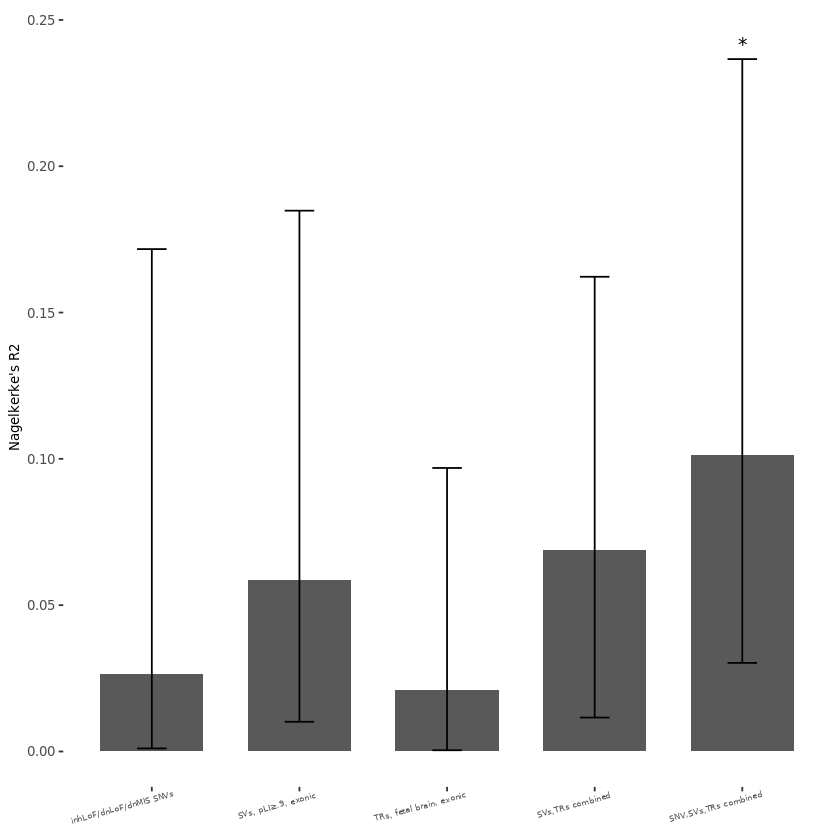

In [8]:
size_txt = 8
size_sig = 4

w1 = 0.7 # was 0.7
w2 = 0.2 # was 0.2

base_ngk <- ggplot(my_data, aes(x = var_labels, y = ngk_r2s)) +
          geom_bar(stat = "identity", width = w1) +
          geom_errorbar(aes(ymin = ngk_ci_lower, ymax = ngk_ci_uppers), width = w2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = ngk_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Nagelkerke's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 15, vjust = 1, hjust=.8, size=size_txt-3),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                #plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=var_labels, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_ngk)


if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_CNVburden_', prs_mode, '_vars_Nagelkerke_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_CNVburden_', prs_mode, '_vars_Nagelkerke', fig_suf, '.png')
}

### figure name is temporary and for testing
#fig_name = paste0(dir_fig, 'R2_CNVburden', '.png')
#fig_name = paste0(dir_fig, 'R2_noCNVburden', '.png')
print(fig_name)
ggsave(fig_name, plot=base_ngk, width = 2.5, height = 1.75, dpi = 1200, units = "in")

In [16]:
### with CNV burden
my_data

variables,var_labels,ngk_r2s,ngk_ci_lower,ngk_ci_upper,ngk_ste,ano_pval,Platform,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
count_dnlof_inhlof,inhLoF/dnLoF/dnMIS SNVs,0.02638537,0.02638537,0.02638537,0,0.06228492,All,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl,"SVs, pLI≥.9, exonic",0.05851806,0.05851806,0.05851806,0,0.09536568,All,
count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"TRs, fetal brain, exonic",0.02115110,0.02115110,0.02115110,0,0.24968349,All,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"SVs,TRs combined",0.06895818,0.06895818,0.06895818,0,0.15314539,All,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof,"SNV,SVs,TRs combined",0.10142898,0.10142898,0.10142898,0,0.04841914,All,*


In [27]:
### without CNV burden
my_data

variables,ngk_r2s,ngk_ci_lower,ngk_ci_upper,ngk_ste,ano_pval,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
count_dnlof_inhlof,0.03197544,0.03197544,0.03197544,0,0.03790436,*
count_PLIp9_cds + count_PLIp9_utr,0.01942887,0.01942887,0.01942887,0,0.27334062,
count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,0.01647189,0.01647189,0.01647189,0,0.33379397,
count_PLIp9_cds + count_PLIp9_utr + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,0.03030244,0.03030244,0.03030244,0,0.39545515,
count_PLIp9_cds + count_PLIp9_utr + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof,0.06412140,0.06412140,0.06412140,0,0.11499615,


In [9]:
### write burden test table
this_cols = c('variables', 'ngk_r2s', 'ngk_ci_lower', 'ngk_ci_upper', 'ngk_ste', 'ano_pval')
new_cols = c('Category', 'R2', 'lower 95% CI', 'upper 95% CI', 'SE', 'p-value')
this_data_out = my_data[,this_cols]
this_data_out$variables = var_labels
# formating the columns with number of digits
for (i_col in 2:length(this_cols)) {
    this_col = this_cols[i_col]
    this_data_out[this_col] = format(this_data_out[this_col], digits = 4, nsmall = 2)
}
colnames(this_data_out) <- new_cols
print(this_data_out)
#file_out = paste0(dir_fig, 'R2_table.tsv')
file_out = paste0(dir_fig, 'R2_CNVburden_table.tsv')
print(file_out)
write.table(this_data_out, file = file_out, sep = "\t", row.names = FALSE, quote = FALSE)

                  Category      R2 lower 95% CI upper 95% CI      SE p-value
1  inhLoF/dnLoF/dnMIS SNVs 0.02639    0.0010375      0.17167 0.02978 0.06228
2      SVs, pLI≥.9, exonic 0.05852    0.0101539      0.18481 0.04289 0.09537
3 TRs, fetal brain, exonic 0.02115    0.0004301      0.09688 0.03473 0.24968
4         SVs,TRs combined 0.06896    0.0116046      0.16223 0.04890 0.15315
5     SNV,SVs,TRs combined 0.10143    0.0302768      0.23660 0.05425 0.04842
[1] "R_clogit/for_publish_fin/R2_CNVburden_table.tsv"


In [9]:
### for ONT platform
# using the same parameters as the combined data

this_df_main = df_main_ont

ngk_r2s = c()
ngk_ci_lowers = c()
ngk_ci_uppers = c()
ngk_stes = c()
mcf_r2s = c()
mcf_ci_lowers = c()
mcf_ci_uppers = c()
mcf_stes = c()
ano_pvals = c()

print('with CNV burden...')
sv_fts = c('PLIp9_cds + PLIp9_utr + cnvs_sh + cnvs_cl')
sv_labels = c('SVs, pLI≥.9, exonic')

#print('without CNV burden...')
#sv_fts = c('PLIp9_cds + PLIp9_utr')
#sv_labels = c('SVs, pLI≥.9, exonic')

gw_sv_var = 'count_genomewide'
gw_sv_var_ooc = 'gw_sv_ooc'
if (use_gw_cov_ooc) {
    this_df_main[gw_sv_var_ooc] = this_df_main[gw_sv_var] - this_df_main['count_PLIp9_cds'] - this_df_main['count_PLIp9_utr']
} else {
    this_df_main[gw_sv_var_ooc] = this_df_main[gw_sv_var]
}

tr_fts = c('DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
tr_labels = c('TRs, fetal brain, exonic')

gw_tr_var = paste0('count_ZS', zs_thr, '_genomewide_SUPP', supp_thr, q_suf)
gw_tr_var_ooc = 'gw_tr_ooc'

if (use_gw_cov_ooc) {
    this_df_main[gw_tr_var_ooc] = this_df_main[gw_tr_var] - this_df_main[paste0('count_ZS', zs_thr, '_PLIp9_cds', '_SUPP', supp_thr, q_suf)] - this_df_main[paste0('count_ZS', zs_thr, '_PLIp9_utr', '_SUPP', supp_thr, q_suf)]
} else {
    this_df_main[gw_tr_var_ooc] = this_df_main[gw_tr_var]
}

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
##print('var_svs:')
##print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
##print('var_trs:')
##print(var_trs)

var_asd = 'PRS_ASD_Z'
var_scz = 'PRS_SCZ_Z'
var_edu = 'PRS_EDU_Z'
var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
var_snv = 'count_dnlof_inhlof'

#print('with CNV burden...')
#vars_all = paste(c(var_snv, var_svs[length(var_svs)], var_trs[length(var_trs)], var_asd, var_scz, var_edu, 'count_cnvs_sh', 'count_cnvs_cl'), collapse=' + ')
#print('without CNV burden...')
vars_all = paste(c(var_snv, var_svs[length(var_svs)], var_trs[length(var_trs)], var_asd, var_scz, var_edu), collapse=' + ')
print('vars_all:')
print(vars_all)
vars_all_vec = unlist(strsplit(vars_all, split='+', fixed=TRUE)) # split vars with +
vars_all_vec = str_trim(vars_all_vec) # trim spaces

var_svs_trs = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)]), collapse=' + ')
##print('var_svs_trs:')
##print(var_svs_trs)

var_svs_trs_snv = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)], var_snv), collapse=' + ')
print('var_svs_trs_snv:')
print(var_svs_trs_snv)

#vars = c(var_snv, var_svs, var_trs, var_svs_trs, var_asd, var_scz, var_edu, var_prs, vars_all)
#var_labels = c('LOF-SNV', sv_labels, tr_labels, 'SVs,TRs combined', 'PRS.ASD', 'PRS.SCZ', 'PRS.EDU', 'PRS.ASD+SCZ+EDU', 'SVs,TRs,SNVs,PRS combined')
vars = c(var_snv, var_svs, var_trs, var_svs_trs, var_svs_trs_snv)
var_labels = c('inhLoF/dnLoF/dnMIS SNVs', sv_labels, tr_labels, 'SVs,TRs combined', 'SNV,SVs,TRs combined')
##print('vars:')
##print(vars)

for (i_var in 1:length(vars)) {
#for (i_var in 1:1) {
#for (i_var in length(vars):length(vars)) {

    var = vars[i_var]
    print(paste('working on var:', var))

    var_vec = unlist(strsplit(var, split='+', fixed=TRUE)) # split vars with +
    var_vec = str_trim(var_vec) # trim spaces
    ##print('var_vec:')
    ##print(var_vec)
    
    vars_null = c()
    for (var_test in vars_all_vec) {
        if (!(var_test %in% var_vec)) {
            vars_null = c(vars_null, var_test)
        }
    }
    vars_null = paste(vars_null, collapse=' + ')
    ##print('vars_null:')
    ##print(vars_null)
    
    ### clogit null
    null_formula = as.formula(paste('Phenotype ~', vars_null, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc, 
                                    '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    if (SHOW_FORMULA) {
        print('null_formula:')
        print(null_formula)
    }
    #null_model <- clogit(null_formula, data = this_df_main)
    null_model <- clogit(null_formula, data = this_df_main, method="approximate")
    #loglik0 = null_model$loglik[2]
    loglik0 = logLik(null_model)

    if (SHOW_FORMULA) {
        print('null_model:')
        print(summary(null_model))
    }

    #model_formula = as.formula(paste('Phenotype ~',vars_all, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc,
    #                             '+ sex + MEAN_COVERAGE + gw_sv_ooc + gw_tr_ooc + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    model_formula = as.formula(paste('Phenotype ~',vars_all, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc,
                                 '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    if (SHOW_FORMULA) {
        print('model_formula:')
        print(model_formula)
    }
    
    #clogit_model <- clogit(model_formula, data = this_df_main)
    clogit_model <- clogit(model_formula, data = this_df_main, method="approximate")
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    cs_r2 = 1.0 - exp(2/nrow(this_df_main) * (loglik0 - loglikM))
    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(this_df_main) * (loglik0)))
    #print('loglikM:')
    #print(loglikM)
    #print('mcf_r2:')
    #print(mcf_r2)
    #print('cs_r2:')
    #print(cs_r2)
    #print('ngk_r2:')
    #print(ngk_r2)

    if (SHOW_FORMULA) {
        print('clogit_model:')
        print(summary(clogit_model))
    }
    
    # compute anova pvalue
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        set.seed(0)
        ##mcf_r2_stats <- boot(data=this_df_main, statistic=getMcFaddenR2_bootstrap, R=BS_N, 
        ##                     null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ##print(mcf_r2_stats)
        ##mcf_ste = sd(mcf_r2_stats$t)
        ##mcf_ci = boot.ci(mcf_r2_stats, type="bca")
        ##mcf_ci_lower = as.double(mcf_ci$bca[1,4])
        ##mcf_ci_upper = as.double(mcf_ci$bca[1,5])

        ngk_r2_stats <- boot(data=this_df_main, statistic=getNagelkerkeR2_bootstrap, R=BS_N, 
                             null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ngk_ste = sd(ngk_r2_stats$t, na.rm = TRUE)
        ngk_ci = boot.ci(ngk_r2_stats, type="bca")
        ngk_ci_lower = as.double(ngk_ci$bca[1,4])
        ngk_ci_upper = as.double(ngk_ci$bca[1,5])

        print('ngk_ste:')
        print(ngk_ste)
        print('ngk_ci:')
        print(ngk_ci)
        print('ngk_ci_lower:')
        print(ngk_ci_lower)
        print('ngk_ci_upper:')
        print(ngk_ci_upper)
    }
    else {
        mcf_ste = 0
        mcf_ci_lower = mcf_r2
        mcf_ci_upper = mcf_r2
        
        ngk_ste = 0
        ngk_ci_lower = ngk_r2
        ngk_ci_upper = ngk_r2
        
    }
    ngk_r2s = c(ngk_r2s, ngk_r2)
    ngk_ci_lowers = c(ngk_ci_lowers, ngk_ci_lower)
    ngk_ci_uppers = c(ngk_ci_uppers, ngk_ci_upper)
    ngk_stes = c(ngk_stes, ngk_ste)
    #mcf_r2s = c(mcf_r2s, mcf_r2)
    #mcf_ci_lowers = c(mcf_ci_lowers, mcf_ci_lower)
    #mcf_ci_uppers = c(mcf_ci_uppers, mcf_ci_upper)
    #mcf_stes = c(mcf_stes, mcf_ste)
    ano_pvals = c(ano_pvals, ano_pval)

    SHOW_FORMULA = FALSE
}

my_data_ont = data.frame('variables' = vars, 'var_labels' = var_labels, 'ngk_r2s' = ngk_r2s, 
                     #'mcf_r2s' = mcf_r2s, 
                     'ngk_ci_lower' = ngk_ci_lowers, 'ngk_ci_upper' = ngk_ci_uppers, 'ngk_ste' = ngk_stes, 
                     #'mcf_ci_lower' = mcf_ci_lowers, 'mcf_ci_upper' = mcf_ci_uppers, 'mcf_ste' = mcf_stes, 
                     'ano_pval' = ano_pvals, 'Platform' = 'ONT')

sig <- sapply(my_data_ont$ano_pval, get_pval_char)
my_data_ont$sig = sig
my_data_ont

[1] "with CNV burden..."
[1] "vars_all:"
[1] "count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z"
[1] "var_svs_trs_snv:"
[1] "count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof"
[1] "working on var: count_dnlof_inhlof"
[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl"
[1] "working on var: count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q"
[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q"
[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q 

variables,var_labels,ngk_r2s,ngk_ci_lower,ngk_ci_upper,ngk_ste,ano_pval,Platform,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
count_dnlof_inhlof,inhLoF/dnLoF/dnMIS SNVs,0.06328334,0.06328334,0.06328334,0,0.06138192,ONT,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl,"SVs, pLI≥.9, exonic",0.01812051,0.01812051,0.01812051,0,0.80897123,ONT,
count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"TRs, fetal brain, exonic",0.06962955,0.06962955,0.06962955,0,0.14444404,ONT,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"SVs,TRs combined",0.10311756,0.10311756,0.10311756,0,0.31753658,ONT,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof,"SNV,SVs,TRs combined",0.16693378,0.16693378,0.16693378,0,0.12274388,ONT,


In [10]:
### for PB platform
# using the same parameters as the combined data

this_df_main = df_main_pb

ngk_r2s = c()
ngk_ci_lowers = c()
ngk_ci_uppers = c()
ngk_stes = c()
mcf_r2s = c()
mcf_ci_lowers = c()
mcf_ci_uppers = c()
mcf_stes = c()
ano_pvals = c()

print('with CNV burden...')
sv_fts = c('PLIp9_cds + PLIp9_utr + cnvs_sh + cnvs_cl')
sv_labels = c('SVs, pLI≥.9, exonic')

#print('without CNV burden...')
#sv_fts = c('PLIp9_cds + PLIp9_utr')
#sv_labels = c('SVs, pLI≥.9, exonic')

gw_sv_var = 'count_genomewide'
gw_sv_var_ooc = 'gw_sv_ooc'
if (use_gw_cov_ooc) {
    this_df_main[gw_sv_var_ooc] = this_df_main[gw_sv_var] - this_df_main['count_PLIp9_cds'] - this_df_main['count_PLIp9_utr']
} else {
    this_df_main[gw_sv_var_ooc] = this_df_main[gw_sv_var]
}

tr_fts = c('DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr')
tr_labels = c('TRs, fetal brain, exonic')

gw_tr_var = paste0('count_ZS', zs_thr, '_genomewide_SUPP', supp_thr, q_suf)
gw_tr_var_ooc = 'gw_tr_ooc'

if (use_gw_cov_ooc) {
    this_df_main[gw_tr_var_ooc] = this_df_main[gw_tr_var] - this_df_main[paste0('count_ZS', zs_thr, '_PLIp9_cds', '_SUPP', supp_thr, q_suf)] - this_df_main[paste0('count_ZS', zs_thr, '_PLIp9_utr', '_SUPP', supp_thr, q_suf)]
} else {
    this_df_main[gw_tr_var_ooc] = this_df_main[gw_tr_var]
}

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
##print('var_svs:')
##print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
##print('var_trs:')
##print(var_trs)

var_asd = 'PRS_ASD_Z'
var_scz = 'PRS_SCZ_Z'
var_edu = 'PRS_EDU_Z'
var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
var_snv = 'count_dnlof_inhlof'

#print('with CNV burden...')
#vars_all = paste(c(var_snv, var_svs[length(var_svs)], var_trs[length(var_trs)], var_asd, var_scz, var_edu, 'count_cnvs_sh', 'count_cnvs_cl'), collapse=' + ')
#print('without CNV burden...')
vars_all = paste(c(var_snv, var_svs[length(var_svs)], var_trs[length(var_trs)], var_asd, var_scz, var_edu), collapse=' + ')
print('vars_all:')
print(vars_all)
vars_all_vec = unlist(strsplit(vars_all, split='+', fixed=TRUE)) # split vars with +
vars_all_vec = str_trim(vars_all_vec) # trim spaces

var_svs_trs = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)]), collapse=' + ')
##print('var_svs_trs:')
##print(var_svs_trs)

var_svs_trs_snv = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)], var_snv), collapse=' + ')
print('var_svs_trs_snv:')
print(var_svs_trs_snv)

#vars = c(var_snv, var_svs, var_trs, var_svs_trs, var_asd, var_scz, var_edu, var_prs, vars_all)
#var_labels = c('LOF-SNV', sv_labels, tr_labels, 'SVs,TRs combined', 'PRS.ASD', 'PRS.SCZ', 'PRS.EDU', 'PRS.ASD+SCZ+EDU', 'SVs,TRs,SNVs,PRS combined')
vars = c(var_snv, var_svs, var_trs, var_svs_trs, var_svs_trs_snv)
var_labels = c('inhLoF/dnLoF/dnMIS SNVs', sv_labels, tr_labels, 'SVs,TRs combined', 'SNV,SVs,TRs combined')
##print('vars:')
##print(vars)

for (i_var in 1:length(vars)) {
#for (i_var in 1:1) {
#for (i_var in length(vars):length(vars)) {

    var = vars[i_var]
    print(paste('working on var:', var))

    var_vec = unlist(strsplit(var, split='+', fixed=TRUE)) # split vars with +
    var_vec = str_trim(var_vec) # trim spaces
    ##print('var_vec:')
    ##print(var_vec)
    
    vars_null = c()
    for (var_test in vars_all_vec) {
        if (!(var_test %in% var_vec)) {
            vars_null = c(vars_null, var_test)
        }
    }
    vars_null = paste(vars_null, collapse=' + ')
    ##print('vars_null:')
    ##print(vars_null)
    
    ### clogit null
    null_formula = as.formula(paste('Phenotype ~', vars_null, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc, 
                                    '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    if (SHOW_FORMULA) {
        print('null_formula:')
        print(null_formula)
    }
    #null_model <- clogit(null_formula, data = this_df_main)
    null_model <- clogit(null_formula, data = this_df_main, method="approximate")
    #loglik0 = null_model$loglik[2]
    loglik0 = logLik(null_model)

    if (SHOW_FORMULA) {
        print('null_model:')
        print(summary(null_model))
    }

    #model_formula = as.formula(paste('Phenotype ~',vars_all, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc,
    #                             '+ sex + MEAN_COVERAGE + gw_sv_ooc + gw_tr_ooc + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    model_formula = as.formula(paste('Phenotype ~',vars_all, '+', gw_sv_var_ooc, '+', gw_tr_var_ooc,
                                 '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    if (SHOW_FORMULA) {
        print('model_formula:')
        print(model_formula)
    }
    
    #clogit_model <- clogit(model_formula, data = this_df_main)
    clogit_model <- clogit(model_formula, data = this_df_main, method="approximate")
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    cs_r2 = 1.0 - exp(2/nrow(this_df_main) * (loglik0 - loglikM))
    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(this_df_main) * (loglik0)))
    #print('loglikM:')
    #print(loglikM)
    #print('mcf_r2:')
    #print(mcf_r2)
    #print('cs_r2:')
    #print(cs_r2)
    #print('ngk_r2:')
    #print(ngk_r2)

    if (SHOW_FORMULA) {
        print('clogit_model:')
        print(summary(clogit_model))
    }
    
    # compute anova pvalue
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        set.seed(0)
        ##mcf_r2_stats <- boot(data=this_df_main, statistic=getMcFaddenR2_bootstrap, R=BS_N, 
        ##                     null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ##print(mcf_r2_stats)
        ##mcf_ste = sd(mcf_r2_stats$t)
        ##mcf_ci = boot.ci(mcf_r2_stats, type="bca")
        ##mcf_ci_lower = as.double(mcf_ci$bca[1,4])
        ##mcf_ci_upper = as.double(mcf_ci$bca[1,5])

        ngk_r2_stats <- boot(data=this_df_main, statistic=getNagelkerkeR2_bootstrap, R=BS_N, 
                             null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ngk_ste = sd(ngk_r2_stats$t, na.rm = TRUE)
        ngk_ci = boot.ci(ngk_r2_stats, type="bca")
        ngk_ci_lower = as.double(ngk_ci$bca[1,4])
        ngk_ci_upper = as.double(ngk_ci$bca[1,5])

        print('ngk_ste:')
        print(ngk_ste)
        print('ngk_ci:')
        print(ngk_ci)
        print('ngk_ci_lower:')
        print(ngk_ci_lower)
        print('ngk_ci_upper:')
        print(ngk_ci_upper)
    }
    else {
        mcf_ste = 0
        mcf_ci_lower = mcf_r2
        mcf_ci_upper = mcf_r2
        
        ngk_ste = 0
        ngk_ci_lower = ngk_r2
        ngk_ci_upper = ngk_r2
        
    }
    ngk_r2s = c(ngk_r2s, ngk_r2)
    ngk_ci_lowers = c(ngk_ci_lowers, ngk_ci_lower)
    ngk_ci_uppers = c(ngk_ci_uppers, ngk_ci_upper)
    ngk_stes = c(ngk_stes, ngk_ste)
    #mcf_r2s = c(mcf_r2s, mcf_r2)
    #mcf_ci_lowers = c(mcf_ci_lowers, mcf_ci_lower)
    #mcf_ci_uppers = c(mcf_ci_uppers, mcf_ci_upper)
    #mcf_stes = c(mcf_stes, mcf_ste)
    ano_pvals = c(ano_pvals, ano_pval)

    SHOW_FORMULA = FALSE
}

my_data_pb = data.frame('variables' = vars, 'var_labels' = var_labels, 'ngk_r2s' = ngk_r2s, 
                     #'mcf_r2s' = mcf_r2s, 
                     'ngk_ci_lower' = ngk_ci_lowers, 'ngk_ci_upper' = ngk_ci_uppers, 'ngk_ste' = ngk_stes, 
                     #'mcf_ci_lower' = mcf_ci_lowers, 'mcf_ci_upper' = mcf_ci_uppers, 'mcf_ste' = mcf_stes, 
                     'ano_pval' = ano_pvals, 'Platform' = 'PB')

sig <- sapply(my_data_pb$ano_pval, get_pval_char)
my_data_pb$sig = sig
my_data_pb

[1] "with CNV burden..."
[1] "vars_all:"
[1] "count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z"
[1] "var_svs_trs_snv:"
[1] "count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof"
[1] "working on var: count_dnlof_inhlof"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  3,4 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4,5 ; coefficient may be infinite. ”


[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4,5 ; coefficient may be infinite. ”


[1] "working on var: count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4,5 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4,5 ; coefficient may be infinite. ”


[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4,5 ; coefficient may be infinite. ”


[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof"


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4,5 ; coefficient may be infinite. ”


variables,var_labels,ngk_r2s,ngk_ci_lower,ngk_ci_upper,ngk_ste,ano_pval,Platform,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
count_dnlof_inhlof,inhLoF/dnLoF/dnMIS SNVs,0.0442317962,0.0442317962,0.0442317962,0,0.09430336,PB,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl,"SVs, pLI≥.9, exonic",0.0878911640,0.0878911640,0.0878911640,0,0.21717405,PB,
count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"TRs, fetal brain, exonic",0.0003047428,0.0003047428,0.0003047428,0,0.99073281,PB,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"SVs,TRs combined",0.0887192488,0.0887192488,0.0887192488,0,0.44293662,PB,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof,"SNV,SVs,TRs combined",0.1540922568,0.1540922568,0.1540922568,0,0.15161218,PB,


In [11]:
print('my_data:')
my_data
print('my_data_ont:')
my_data_ont
print('my_data_pb:')
my_data_pb

[1] "my_data:"


variables,var_labels,ngk_r2s,ngk_ci_lower,ngk_ci_upper,ngk_ste,ano_pval,Platform,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
count_dnlof_inhlof,inhLoF/dnLoF/dnMIS SNVs,0.02638537,0.02638537,0.02638537,0,0.06228492,All,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl,"SVs, pLI≥.9, exonic",0.05851806,0.05851806,0.05851806,0,0.09536568,All,
count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"TRs, fetal brain, exonic",0.02115110,0.02115110,0.02115110,0,0.24968349,All,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"SVs,TRs combined",0.06895818,0.06895818,0.06895818,0,0.15314539,All,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof,"SNV,SVs,TRs combined",0.10142898,0.10142898,0.10142898,0,0.04841914,All,*


[1] "my_data_ont:"


variables,var_labels,ngk_r2s,ngk_ci_lower,ngk_ci_upper,ngk_ste,ano_pval,Platform,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
count_dnlof_inhlof,inhLoF/dnLoF/dnMIS SNVs,0.06328334,0.06328334,0.06328334,0,0.06138192,ONT,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl,"SVs, pLI≥.9, exonic",0.01812051,0.01812051,0.01812051,0,0.80897123,ONT,
count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"TRs, fetal brain, exonic",0.06962955,0.06962955,0.06962955,0,0.14444404,ONT,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"SVs,TRs combined",0.10311756,0.10311756,0.10311756,0,0.31753658,ONT,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof,"SNV,SVs,TRs combined",0.16693378,0.16693378,0.16693378,0,0.12274388,ONT,


[1] "my_data_pb:"


variables,var_labels,ngk_r2s,ngk_ci_lower,ngk_ci_upper,ngk_ste,ano_pval,Platform,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
count_dnlof_inhlof,inhLoF/dnLoF/dnMIS SNVs,0.0442317962,0.0442317962,0.0442317962,0,0.09430336,PB,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl,"SVs, pLI≥.9, exonic",0.0878911640,0.0878911640,0.0878911640,0,0.21717405,PB,
count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"TRs, fetal brain, exonic",0.0003047428,0.0003047428,0.0003047428,0,0.99073281,PB,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q,"SVs,TRs combined",0.0887192488,0.0887192488,0.0887192488,0,0.44293662,PB,
count_PLIp9_cds + count_PLIp9_utr + count_cnvs_sh + count_cnvs_cl + count_ZS3_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_DEV_BR_GENE_10_utr_SUPP2_Q + count_dnlof_inhlof,"SNV,SVs,TRs combined",0.1540922568,0.1540922568,0.1540922568,0,0.15161218,PB,


[1] "R_clogit/for_publish_fin/R2_CNVburden_AllPlat_prscs_vars_Nagelkerke_supp2.png"


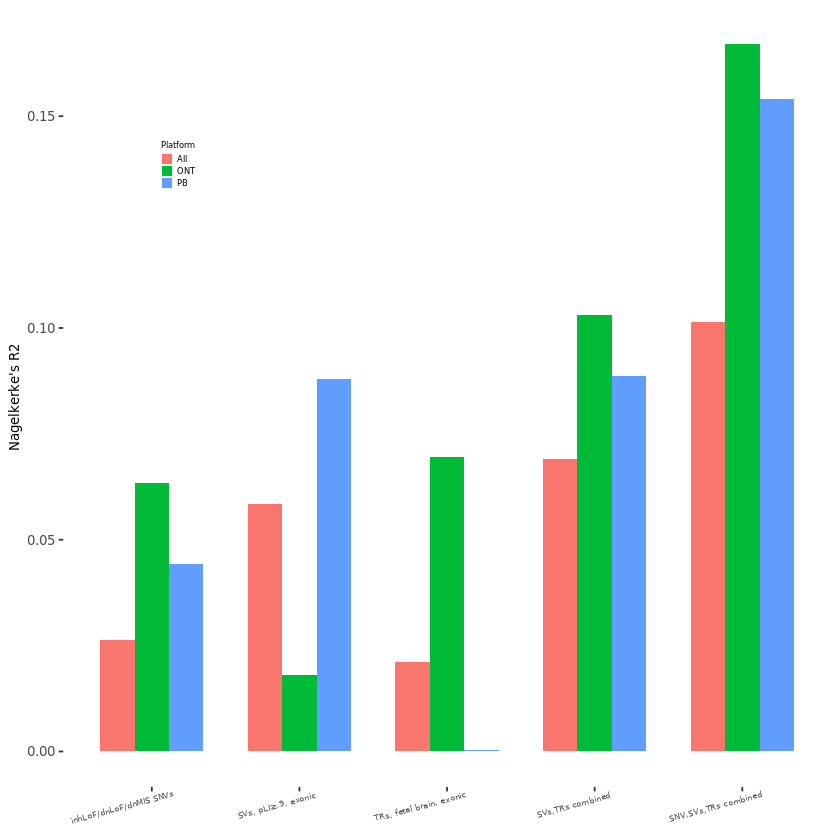

In [18]:
### platforms together
my_data_all = rbind(my_data, my_data_ont, my_data_pb)
#my_data_all$var_labels <- factor(my_data_all$var_labels, levels = var_labels)
size_txt = 8
size_sig = 4

w1 = 0.7 # was 0.7
w2 = 0.2 # was 0.2

base_ngk <- ggplot(my_data_all, aes(x = var_labels, y = ngk_r2s, fill=Platform)) +
          geom_bar(stat = "identity", width = w1, position = "dodge") +
          #*geom_errorbar(aes(ymin = ngk_ci_lower, ymax = ngk_ci_uppers, position = position_dodge(width=0.5)), width = w2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          #*geom_text(aes(label = sig, y = ngk_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Nagelkerke's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 15, vjust = 1, hjust=.8, size=size_txt-3),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                #plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                legend.position = c(0.15, 0.8),
                legend.text = element_text(size=size_txt-3),
                legend.title = element_text(size=size_txt-3),
                legend.key.height = unit(0.1, "in"),         # Adjust legend key height
                legend.key.width = unit(0.1, "in")           # Adjust legend key width
               ) +
          scale_x_discrete(limits=var_labels, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_ngk)


if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_CNVburden_AllPlat_', prs_mode, '_vars_Nagelkerke_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_CNVburden_AllPlat_', prs_mode, '_vars_Nagelkerke', fig_suf, '.png')
}

### figure name is temporary and for testing
#fig_name = paste0(dir_fig, 'R2_CNVburden', '.png')
#fig_name = paste0(dir_fig, 'R2_noCNVburden', '.png')
print(fig_name)
ggsave(fig_name, plot=base_ngk, width = 2.5, height = 1.75, dpi = 1200, units = "in")